<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Renatta Garcia Sanchez, Juan Enrique Aguirre López

**Fecha:** 06 de octubre del 2020.

**Expediente** : 703275 ,722664 
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Liga repositorio:** https://github.com/renattaGS/Tareas_simproc_aguirre_garcia

# Tarea 4: Clase 9 y 10

## Problema 1

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

## Solución Juan Enrique

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
def comparar_aleatorias_densidad(f, Finv, N):
    u = np.random.uniform(0.1, 0.9, N)
    f_rand = Finv(u)
    x = np.arange(0.1, 0.9, 0.01)
    
    f_densidad = f(x)
    plt.hist(f_rand, bins=30, density=True)
    plt.plot(x, f_densidad)
    plt.show()

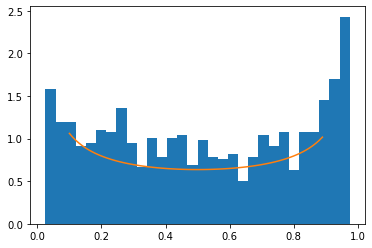

In [2]:
f = lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)  
Finv = lambda u: (np.sin(u*np.pi/2))**2
N = 1000
comparar_aleatorias_densidad(f, Finv, N)

## Solución Renatta

### Planteamiento del problema:

Para resolver este inciso usaremos el método de la trasnformada inversa, ya que para esta función de distribución es sencillo encontrar su inversa. 

El primer paso consiste en igualar nuestra función a U y despejar x, de la siguiente forma:

$$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

Realizamos el despeje obteniendo la siguiente ecuación 

$$x=\sin(\frac{\pi u}{2})^2$$ 

Esta x nos genera valores que se asemejan a la distribución de $f(x)$ 

Para comparar, además vamos a calcular f(x) 

$$f(x)=\frac{d}{dx}F(x)=\frac{1}{\pi\sqrt{x-x^2}}$$

Con estos valores, ya podemos hacer la simulación para comprobar que efectivamente, los valores generados por x generan f(x)

In [3]:
#importar liberías
import numpy as np 
import matplotlib.pyplot as plt

def comparar_aleatorios_densidad(f: 'función de distribución de probabiliad', 
                                 finv: 'función inversa', 
                                 N: 'Número de valores que queremos generar'):
    '''Esta función dada una función de distribución f y una función inversa que genera valores que se distribyen como f
    grafica el histograma de los valores generados por la funcion inversa así como la grafica de la función de distribución
    de probabilidad para poder hacer la comparación de estos y verificar si se cumple'''
    
    U=np.random.uniform(0.1, 0.9, N)
    frand=finv(U)
    
    x=np.arange(0,1,0.01)
    fdensidad=f(x)
    
    plt.hist(frand, density=True)
    plt.plot(x, fdensidad)
    plt.show()
    

C:\Users\renat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


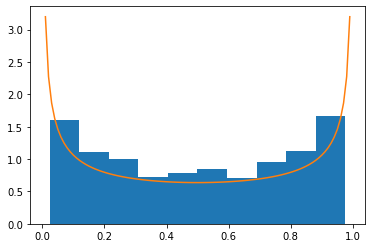

In [4]:
f=lambda x: 1/(np.pi*(np.sqrt(x-x**2))) #función f(x)
finv=lambda x: np.sin((np.pi*x)/2)**2 # función inversa que genera a f(x)
N=1000 #numero de valores que vamos a Smular
comparar_aleatorios_densidad(f, finv, N) #aplicar función

## Problema 2

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

## Solución Juan Enrique

In [5]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [6]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [7]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

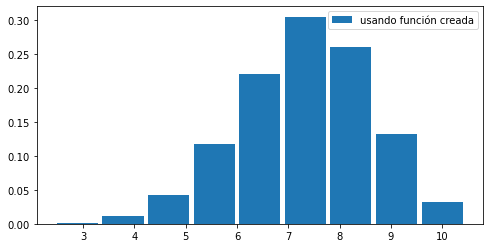

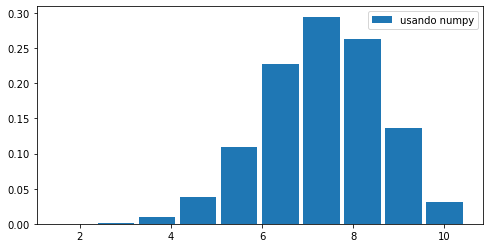

In [8]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

Aqui podemos observar, que ambos histogramas son practicamente idénticos, por lo que es practicamente lo mismo usar la libreria de numpy, o crear la función nostros

> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

### Procedimiento para llegar a la ecuación recursiva

$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

Lo que hice fue utilizar esta función de arriba, pero en ves de que X=i, le puse que  X=i+1, que es la ecuación que queremos encontrar. Luego, simplemente simplifique hastaq eus e lelgo a la ecuación de abajo.

$$P(X=i+1)=\frac{n!}{(i+1)!(n-i-1)!}p^i+1(1-p)^{n-i-1} =  \frac{n-i}{i+1} \frac{n!}{i!(n-i)!} (\frac{p}{1-p}) p^i (1-p)^{n-i}$$

$$ = \frac{n-i}{i+1} (\frac{p}{1-p}) P(X=i)     $$

Por lo tanto llegamos a la conclusión que $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

### Conclusiones de esta ecuación recursiva
Dentro de las ventajas que hay en que sea una ecuacion recursiva, esta que son operaciones más sencillas. Ya que, a pesar de que dependes del termino pasado, las operaciones a realizar para encontrar el término que deseas son relativamente sencillas. Además, las ecuaciones recursivas suelen ser las que modelan de mejor manera el comportamiento de sistemas reales.

## Solución Renatta

### Planteamiento del problema (Demostración)

Para demostrar la fórmula recursiva propuesta de $p_{i+1}$ desarrollaré el término de $p_{i+1}$ siguiendo la fórmula de $p_i$. Resultando en lo siguiente 

$$
p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}p^{n-i-1}
$$

Si dividimos este término entre p_{i}, obtenemos lo siguiente:

$$
\frac{p_{i+1}}{p_i}=\frac{\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}}
$$

Efectuando la división obtenemos:

$$
\frac{p_{i+1}}{p_i}=\frac{n!i!(n-1)!}{(i+1!)(n-i-1)!n!}\frac{p^{i+1}(1-p)^{n-i-1}}{p^i(1-p)^{n-i}}
$$

Desarrollando factoriales y simplificando obtemos 

$$
\frac{p_{i+1}}{p_i}=\frac{i!(n-i)(n-i-1)!}{(i+1)i!(n-i-1)(n-i)!}\frac{p}{1-p}
$$

Cancelando nuevamente obtenemos:

$$
\frac{p_{i+1}}{p_i}=\frac{n-i}{i+1}\frac{p}{1-p}
$$

Despejamos $p_{i+1}$ y obtenemos nuestra ecuación 

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

### Planteamiento del problema (Simualción)

Una vez demostrada la fórmula recursiva utilizaremos el método de la transformada inversa para generar los valores aleatorios que generan una variable aleatoria binomial. Recordando que la variable aleatoria sigue la fórmula anteriormente demostrada. El método de la transformada inverse consiste en encontrar un valor $U$ que se encuentre entre $p_0$ y $p_i$ así sucesivamente hasta llegar a encontrar un U que se encuentre entre $p_0+\cdots+p_{n-1}$ y $ p_0+\cdots+p_{n}$

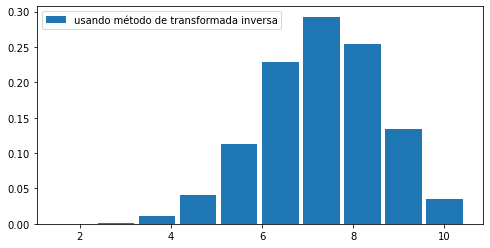

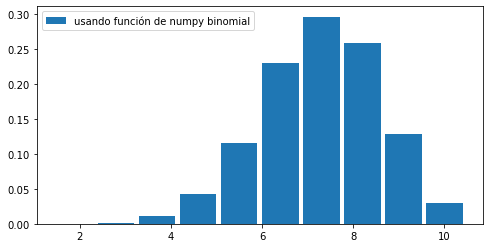

In [9]:
def P_acum_Binomial(n:'Número de repeticiones',
                    p: 'Probabilidad de éxito'):
    
    '''Esta función genera la  función disribución de probabiliad acumulada de una distribución binomial'''
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Esta función aplica el metodo de la trasnformada inversa para variables discretas'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v 

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    ''' Esta función genera el histograma de una variable discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial(n,p)
u = np.random.rand(N)


d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando método de transformada inversa') #aplicando el metodo

d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando función de numpy binomial') #aplicando funciones de numpy


### Conclusiones 
Observamos que usando el método de la transformada inversa podemos generar numeros aleatorios que distribuyan como una variable aleatoria binomial y que al usar la fórmula demostrada reducimos el costo computacional de programar factoriales. Además de que al usar una fórmula recursiva en variables discretas aprovechamos las compresiones que tenemos que hacer para calcular la acumulada, al momento de calcular la función.

## Problema 3

Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.


## Solución Juan Enrique

Esta es la demostracion para ver como llegar de esta ecuación $P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$ a esta $P(k+1)=\frac{\lambda}{k+1}P(k)$

Primero dividimos cuando la ecuación incial cuando X=i+1 por cuando X=i

$$\frac{P(X = i + 1)}{P(X = i)} = \frac{e^{-λ} λ^{i+1}/(i + 1)!}{e^{-λ} λ^i /i!} = \frac{λ}{i + 1} $$

Por lo tanto llegamos a esta ecuación:

$$P(k+1)=\frac{\lambda}{k+1}P(k)$$

In [10]:
# Función que calcula la probabilidad acumulada optimizada
def dist_poiss(k, lamd):
    p = np.zeros(k)
    p[0] = np.exp(-lamd)
    def llenar_vec(k):
        nonlocal p
        p[k + 1] = (lamd*p[k]) / (k+1)
        
    # Lleno el vector p usando compresión de listas
    [llenar_vec(k) for k in range(k-1)]
    return np.cumsum(p)

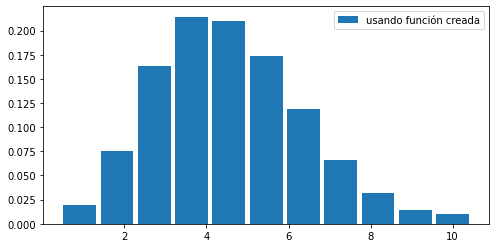

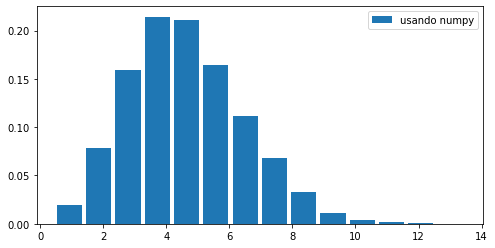

In [11]:
# def D_binomial_intermedia(n,p,N):
k = 10; lamd = 4; N2 = 10**4

p_acum2 = dist_poiss(k, lamd)
u2 = np.random.rand(N2)

# Usando el método de la transformada inversa
d_poiss = Gen_distr_discreta(u2, p_acum2)
plot_histogram_discrete(d_poiss,'usando función creada')

# Usando numpy
d_poiss_numpy = np.random.poisson(lamd, N2)
plot_histogram_discrete(d_poiss_numpy,'usando numpy')

Después de comparar los histogramas hecho por mi y el toro por la librería numpy, podemos ver que son practicamente iguales. Visualmente podemos caer en la falsedad de que no son del todo iguales. Sin embargo, si nos fijamos en el eje 'x', el de la función numpy llega va del 0 al 16, mientra sque el de la función que hice va de 0 a 10, haciendolo ver más cercano el primero al segundo.

## Solución Renatta

### Planteamiento del problema (Demostración)

Para demostrar la fórmula recursiva propuesta de $p(k+1)$ desarrollaré el término de $p(k+1)$ siguiendo la fórmula de $p(k)$. Resultando en lo siguiente 

$$
p(k+1)=\frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}
$$

Si dividimos este término entre p(k) y desarrollamos el exponente y el factorial, obtenemos lo siguiente:

$$
\frac{p(k+1)}{p(k)}=\frac{\frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)(k)!}}{\frac{e^{-\lambda}\lambda^k}{k!}}
$$

Simplificando obtenemos

$$
\frac{p(k+1)}{p(k)}=\frac{\lambda}{k+1}
$$

Despejamos $p(k+1)$ y obtenemos nuestra ecuación  

$$
p(k+1)=\frac{\lambda}{k+1}p(k)
$$


### Planteamiento del problema (Simualción)

Una vez demostrada la fórmula recursiva utilizaremos el método de la transformada inversa para generar los valores aleatorios que generan una variable aleatoria binomial. Recordando que la variable aleatoria sigue la fórmula anteriormente demostrada. El método de la transformada inverse consiste en encontrar un valor $U$ que se encuentre entre $p_0$ y $p_i$ así sucesivamente hasta llegar a encontrar un U que se encuentre entre $p_0+\cdots+p_{k-1}$ y $ p_0+\cdots+p_{k}$

In [12]:
def P_acum_Poisson(tasa: 'Igual al parámetro lambda que indica la media o la tasa de ocurrencia del evento',
                   k: 'Número de ocurrencias del evento'):
    Pr = np.zeros(k)
    Pr[0] =np.exp(-tasa)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(tasa*Pr[i])/(i+1)
        
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

Una vez definida la función para calcular la probabilidad acumulada podemos aplicar el método de la trasnformada inversa, para esto vamos a asignar un valor de 4 a lambada y un valor de 10 a k, para ejemplificar. 

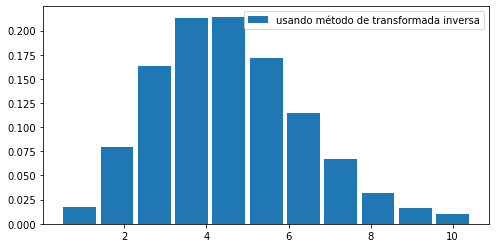

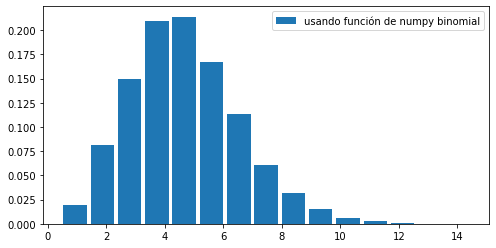

In [13]:
lam=4 ; k = 10; N = 10**4

p_acum_p = P_acum_Poisson(lam,k)
u = np.random.rand(N)


d_poisson = Gen_distr_discreta(u,p_acum_p)
plot_histogram_discrete(d_poisson,'usando método de transformada inversa') #aplicando el metodo

d_poisson_numpy = np.random.poisson(lam,N)
plot_histogram_discrete(d_poisson_numpy,'usando función de numpy binomial') #aplicando funciones de numpy

### Conclusiones
Observamos que ambos histogramas son similares y que la disribución de los datos es muy similar, ya sea con la función de numpy o con la función generada por nosotros

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
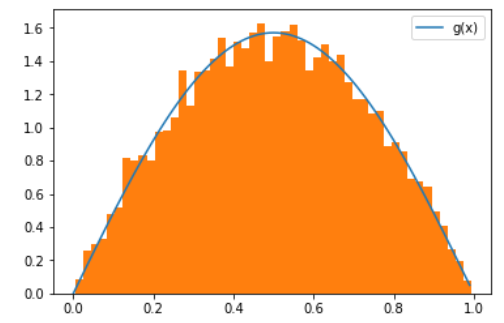

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
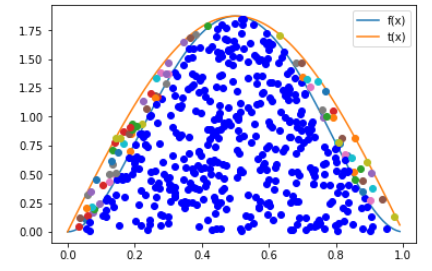

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

## Solución Juan Enrique

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

El máximo de f es: [1.875]


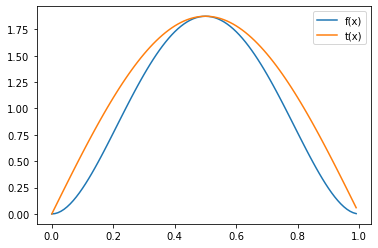

In [14]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) no constante

# Función objetivo
from scipy import optimize
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x) 

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

$g(x) = t(x)/c$  $\rightarrow c = \int_{-\infty}^{\infty}t(x) dx$

$$\int_{0}^{1}a*sin(\pi*x)dx  \rightarrow = a*[\frac{-cos(\pi*x)}{\pi}]_{0}^{1}  =  \frac{2*a}{\pi}=c$$

$$\rightarrow g(x) = \frac{\pi*sin(\pi*x)}{2}$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 


$$\int_{0}^{x}g(x)dx  \rightarrow = \frac{\pi}{2}*[\frac{-cos(\pi*x)}{\pi}]_{0}^{x}  =  1-cos(x^2)=G(x)$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
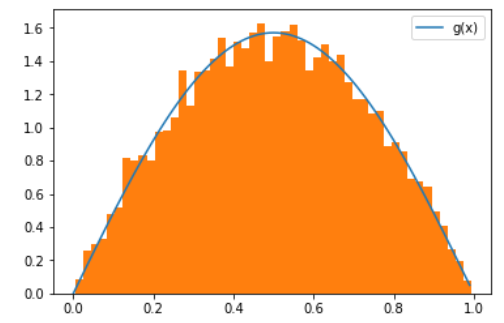

In [15]:
def comparar_aleatorias_densidad_2(f, Finv, N):
    U = np.random.uniform(0, 1, N)
    f_rand = Finv(U)
    x_new = np.arange(0, 1, 0.01)
    
    f_densidad = f(x)
    plt.hist(f_rand, bins=30, density=True)
    plt.plot(x_new, f_densidad)
    plt.show()

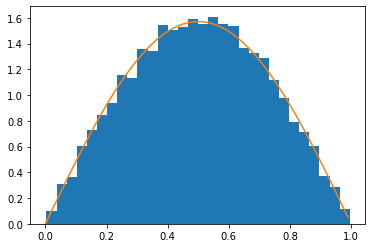

In [16]:
g = lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv = lambda U: (1/np.pi)*np.arccos(-2*U+1)
N = 10000

#plt.plot(x_new, g(x_new), label='g(x)')  #En vez de este plot, usamos la funcion ya creada de comparar_aleatorias
comparar_aleatorias_densidad_2(g, G_inv, N)  

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
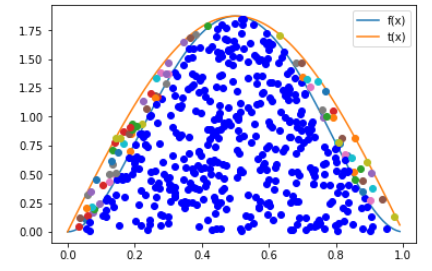

In [17]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


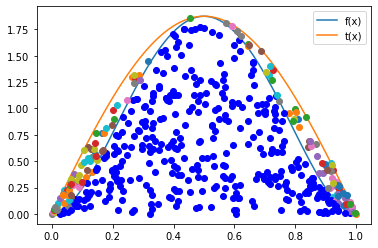

In [18]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t
t = lambda x: max_f*np.sin(np.pi*x) 

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

#aleatorias = Acep_rechazo22(R2,R1,f,t)
Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [19]:
#ESTA FUNCION ES PARA QUE ADEMAS DE GRAFICAR TE DA CUALES SON LAS VARIABLES ALEATORIAS
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo22(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    #[plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         #for i in range(len(R1))]
    variables_aleatorias = [R1[i] for i in range(len(R1)) if condition[i]]
                
    #plt.show()
    return variables_aleatorias

El máximo de f es: [1.875]


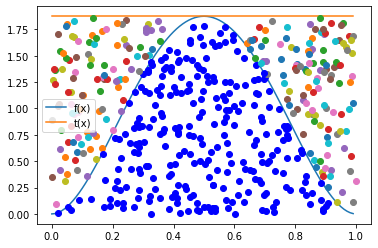

In [20]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f2 = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f2 = f2(optimize.fmin(lambda x:-f2(x),0,disp=False))
# Función t -> Función constante
t2 = lambda x: max_f2*np.ones(len(x)) # función constante

x2 = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f2)
# Gráficas de las funciones
plt.plot(x2,f2(x2),label='f(x)')
plt.plot(x2,t2(x2),label='t(x)')
plt.legend()



# Validación del método
N22 = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R222 = np.random.rand(N22)
R122 = np.random.rand(N22)

Acep_rechazo(R222,R122,f2,t2)

In [21]:
aleatorias_t_const = Acep_rechazo22(R222,R122,f2,t2)
aleatorias_t_sin = Acep_rechazo22(R2,R1,f,t)
len(aleatorias_t_const)/N22, len(aleatorias_t_sin)/ N

(0.536, 0.688)

## Conclusión del punto 6

Al comparar la probabilidad de puntos que se aceptan con este método, después de poner t(x) como una función constante y una t(x) como una funcion senoidal, podemos concluir que la que desecha menos puntos es la senoidal. Dejandola con un margen de puntos aceptados mayor a la de la función constante. Esto tiene mucha lógica, ya que la función senoidal está más pegada al contorno de la función f(x); mientras que la función t(x) constante deja mucho espacio vació entre ambas funciones. Por lo tanto, es mejor una función t(x) senoidal.

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

El máximo de f es: [2.109375]


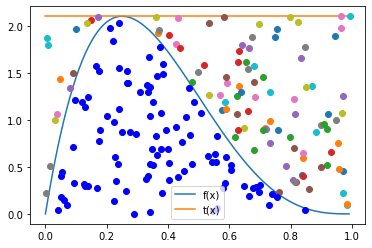

In [22]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f3 = lambda x: 20*x*((1-x)**3)
# Máximo de la función f
max_f3 = f3(optimize.fmin(lambda x:-f3(x),0,disp=False))
# Función t -> Función constante
t3 = lambda x: max_f3*np.ones(len(x)) # función constante

x33 = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f3)
# Gráficas de las funciones
plt.plot(x33,f3(x33),label='f(x)')
plt.plot(x33,t3(x33),label='t(x)')
plt.legend()

# Validación del método
N33 = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R23 = np.random.rand(N33)
R13 = np.random.rand(N33)

#aleatorias33 = Acep_rechazo22(R23,R13,f3,t3)

Acep_rechazo(R23,R13,f3,t3)

## Solución Renatta

1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

Para realizar este inciso es necesario primero conocer el máxio de f(x) que lo hacemos con la función de optimize de scipy y posteriomente realizar la gráfica y comprobar que t(x) es mayor que f(x). En caso de que t(x) no fuera mayor a f(x) sería necesario buscar otra función de t(x) para cumplir con la condición del método

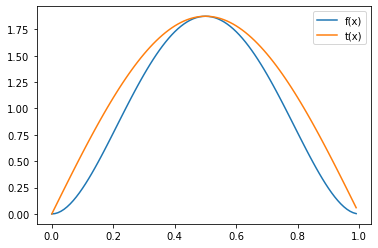

In [23]:
from scipy import optimize 

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))

t= lambda x: max_f*np.sin(np.pi*x)

x = np.arange(0,1,0.01)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend(loc="best")
plt.show()

En la gráfica podemos ver que efectivamente t(x) es siempre mayor o igual a f(x) para el rango de 0 a 1. El único punto donde se cruzan es en el máxio de f(x)

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

Sabemos que $g(x)=\frac{t(x)}{c}$ donde $c=\int_{-\infty}^{\infty} t(x)dx$ Por lo tanto es necesario primero calcular c para después efectuar la división. 
$$
\int_{-\infty}^{\infty} t(x)dx=a(-\cos(\pi x))\frac{1}{\pi}|_{0}^{1}=a\frac{2}{\pi}=c
$$

Calculado g(x) obtenemos:

$$
g(x)=\frac{a \sin(\pi x)}{\frac{2a}{\pi}}=\frac{\pi \sin(\pi x)}{2}
$$

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

Para aplicar el método de la trasnformada inversa es necesario conocer primeor G(x) para esto realizamos la siguiente integral 
$$
G(x)=\int_0^x g(x)dx=\int_0^x \frac{\pi \sin(\pi x)}{2} dx= \frac{-1}{2}\cos(\pi x)|_0^x=\frac{1}{2}-\frac{1}{2}\cos(\pi x)
$$

Una vez calculada G(x) aplicamos el método de la trasformada inversa:

$$
U=\frac{1}{2}-\frac{1}{2}\cos(\pi x)
$$

Realizando el despeje obtenemos 

$$
x=\frac{1}{\pi}\cos^{-1}(-2U+1)
$$

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

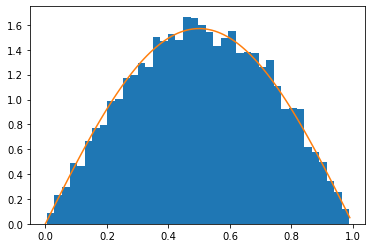

In [24]:
#volvemos a definir la función para hacer los cambios necesarios
def comparar_aleatorios_densidad(f: 'función de distribución de probabiliad', 
                                 finv: 'función inversa', 
                                 N: 'Número de valores que queremos generar'):
    '''Esta función dada una función de distribución f y una función inversa que genera valores que se distribyen como f
    grafica el histograma de los valores generados por la funcion inversa así como la grafica de la función de distribución
    de probabilidad para poder hacer la comparación de estos y verificar si se cumple'''
    
    U=np.random.uniform(0, 1, N)
    frand=finv(U)
    
    x=np.arange(0,1,0.01)
    fdensidad=f(x)
    
    plt.hist(frand, density=True, bins=40)
    plt.plot(x, fdensidad)
    plt.show()

g=lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv=lambda u: (1/np.pi)*np.arccos(-2*u+1)
N=10000

comparar_aleatorios_densidad(g, G_inv, N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

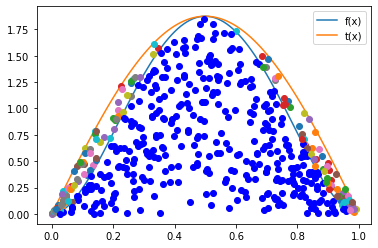

In [25]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    '''Esta función nos regresa una gráfica donde se muestran los puntos acetpados y los puntos rechazados del 
    metodo de acepatación y rechazo'''

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    return 

N=500 #número de puntos
R2=np.random.rand(N)
R1=np.random.rand(N)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t(x), label='t(x)')
plt.legend(loc="best")


Acep_rechazo(R2,R1,f,t)#aplicamos método



6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

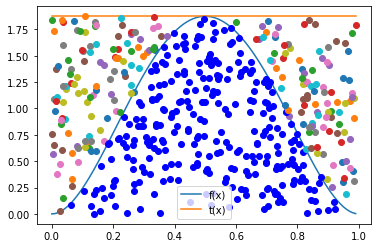

In [26]:
t_cons = lambda x: max_f2*np.ones(len(x))#usamos max_f para hacer t(x) constante

plt.plot(x, f(x), label='f(x)')
plt.plot(x, t_cons(x), label='t(x)')
plt.legend(loc="best")



Acep_rechazo(R2,R1,f, t_cons)



In [27]:
def conteo_Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    '''Esta función nos regresa el vector de puntos aceptados del método de acpetación y rechazo'''

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
  
    aceptados = [R1[i] for i in range(len(R1)) if condition[i]]
    return aceptados

cont_t_var=len(conteo_Acep_rechazo(R2,R1,f, t))/N
cont_t_cons=len(conteo_Acep_rechazo(R2,R1,f, t_cons))/N

print("El porcentaje de puntos aceptados usando t(x) variable es de: ", cont_t_var*100, "% \n")
print("El porcentaje de puntos aceptados usando t(x) constante es de: ", cont_t_cons*100, "% \n")

El porcentaje de puntos aceptados usando t(x) variable es de:  71.2 % 

El porcentaje de puntos aceptados usando t(x) constante es de:  56.00000000000001 % 



### Conclusión 

Es mucho mejor usar una t(x) variable ya que nos otorga un ratio de aceptación mucho más alto que usando una t constante. 

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

In [40]:
x = np.arange(0,1,0.01)
# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = max_f # función constante


def v_a_Acep_rechazo(f:'función objetivo a generar',
                        t:'función que mayora a f',
                        N: 'Variables aleatorioas a genrar'):
    '''Esta función nos regresa N variables aleatorias por medio del método de aceptación y rechazo'''
    aceptados=[x for x in range(N)] #generar vector de puntos
    def llenar(i):
        nonlocal f, t, aceptados
        aleatorio_1=np.random.rand() #generar valor aleatori
        aleatorio_2=np.random.rand() #generar valor aleatorio
        f_x = f(aleatorio_1) #evaluar valor aleatorio en la pdf
        t_x = t #se queda así porque es constante
        condition = aleatorio_2*t_x <=f_x #validar condición 
        while condition==False: #repetir si la condición es falsa
            aleatorio_1=np.random.rand()
            aleatorio_2=np.random.rand()
            f_x = f(aleatorio_1)
            t_x = t
            condition = aleatorio_2*t_x <=f_x 
            
        aceptados[i] = aleatorio_1 #añadir cuando la condición se haga verdadera
    [llenar(i) for i in range(N)]
    return aceptados

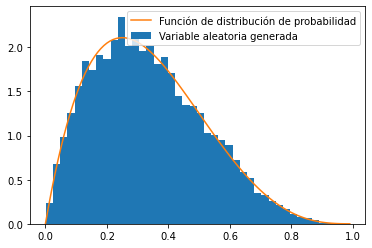

In [47]:
v_a_generada=v_a_Acep_rechazo(f,t,10000)
plt.hist(v_a_generada, density=True, bins=40, label="Variable aleatoria generada")
plt.plot(x, f(x), label="Función de distribución de probabilidad")
plt.legend()
plt.show()
